<h1>Image Classification</h1>


<h2>GrayScale Data</h2>


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=[12, 8])
sns.set_style('darkgrid')

<Figure size 1200x800 with 0 Axes>

In [2]:
from tensorflow.keras.datasets import mnist

2024-03-13 01:45:43.316797: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-13 01:45:44.066014: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-13 01:45:44.066168: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-13 01:45:44.153028: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-13 01:45:44.372494: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-13 01:45:44.375119: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[0]

single_image.shape

(28, 28)

In [6]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

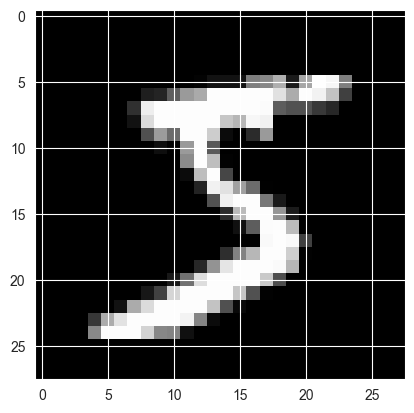

In [7]:
plt.imshow(single_image, cmap='gray')

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_train.shape

(60000,)

In [11]:
y_example = to_categorical(y_train)

In [12]:
y_example.shape

(60000, 10)

In [13]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
y_cat_test = to_categorical(y_test, num_classes=10)

y_cat_test.shape

(10000, 10)

In [15]:
y_cat_train = to_categorical(y_train, num_classes=10)

y_cat_train.shape

(60000, 10)

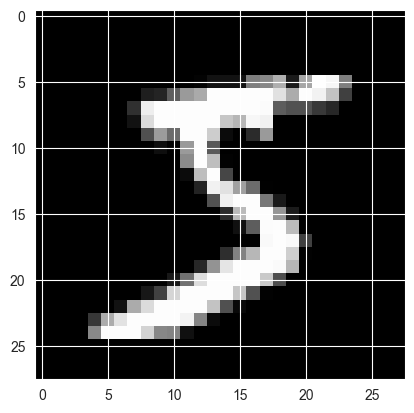

In [16]:
plt.imshow(single_image, cmap='gray')

In [17]:
single_image.max()

255

In [18]:
single_image.min()

0

In [19]:
x_train = x_train / 255
x_test = x_test / 255

In [20]:
scaled_image = x_train[0]

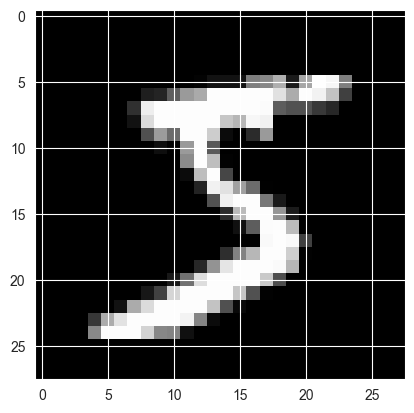

In [21]:
plt.imshow(scaled_image, cmap='gray')

In [22]:
scaled_image.max()

1.0

In [23]:
x_train.shape

(60000, 28, 28)

In [24]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [25]:
x_train.shape

(60000, 28, 28, 1)

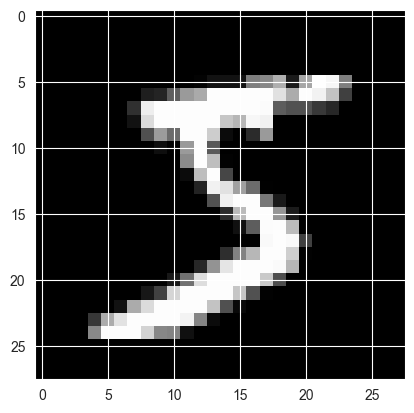

In [26]:
plt.imshow(x_train[0], cmap='gray')

In [27]:
x_test.shape

(10000, 28, 28)

In [28]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [29]:
from tensorflow.keras.models import Sequential

In [30]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [31]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4, 4),
          input_shape=(28, 28, 1), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

# OUTPUT LAYER SOFTMAX --> MULTI CLASS
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [34]:
model.fit(x_train, y_cat_train, epochs=10, validation_data=(
    x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/10


1875/1875 [==============================] - 56s 29ms/step - loss: 0.1351 - accuracy: 0.9602 - val_loss: 0.0625 - val_accuracy: 0.9798
Epoch 2/10
1354/1875 [====================>.........] - ETA: 14s - loss: 0.0451 - accuracy: 0.9865

In [ ]:
metrics = pd.DataFrame(model.history.history)

metrics

,loss,accuracy,val_loss,val_accuracy
0,0.138434,0.956983,0.058774,0.9798
1,0.047565,0.985667,0.043730,0.9851
2,0.030636,0.990683,0.053738,0.9832


<Axes: >

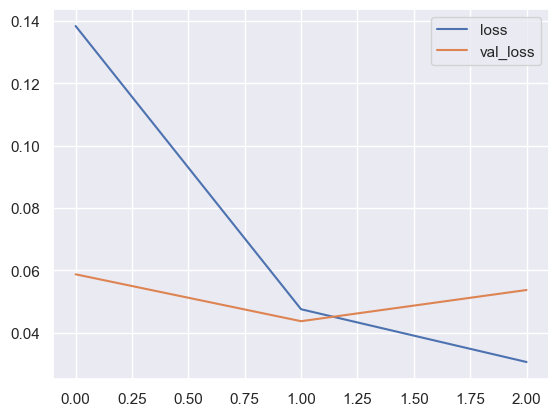

In [ ]:
metrics[['loss', 'val_loss']].plot()

<Axes: >

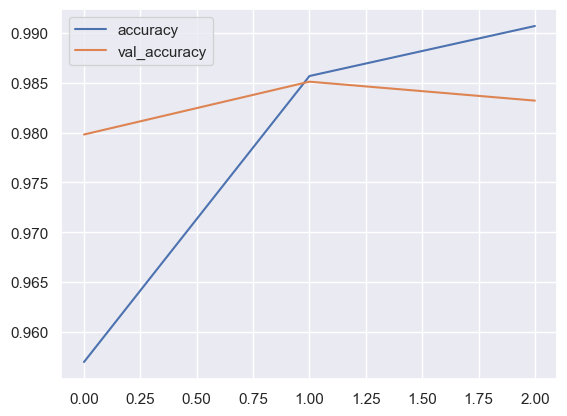

In [ ]:
metrics[['accuracy', 'val_accuracy']].plot()

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
model.evaluate(x_test, y_cat_test, verbose=2)

313/313 - 1s - loss: 0.0537 - accuracy: 0.9832 - 1s/epoch - 4ms/step


[0.053738489747047424, 0.9832000136375427]

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1)

313/313 [==============================] - 2s 6ms/step


In [ ]:
y_cat_test.shape

(10000, 10)

In [ ]:
y_test.shape

(10000,)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      1.00      0.99      1032
           3       0.98      0.99      0.98      1010
           4       0.96      1.00      0.98       982
           5       0.97      0.99      0.98       892
           6       0.98      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       1.00      0.97      0.98       974
           9       1.00      0.93      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
confusion_matrix(y_test, predictions)

array([[ 976,    0,    1,    1,    0,    1,    1,    0,    0,    0],
       [   3, 1128,    2,    0,    0,    0,    2,    0,    0,    0],
       [   1,    2, 1027,    0,    0,    0,    1,    1,    0,    0],
       [   0,    0,    3, 1001,    0,    5,    0,    0,    1,    0],
       [   1,    0,    0,    0,  980,    0,    1,    0,    0,    0],
       [   1,    0,    0,    5,    0,  882,    3,    0,    1,    0],
       [   1,    2,    0,    0,    1,    1,  953,    0,    0,    0],
       [   0,    3,   10,    4,    2,    1,    0, 1007,    1,    0],
       [   6,    2,    4,    4,    2,    4,    7,    1,  942,    2],
       [   3,    6,    2,    8,   34,   13,    1,    6,    0,  936]])

<Axes: >

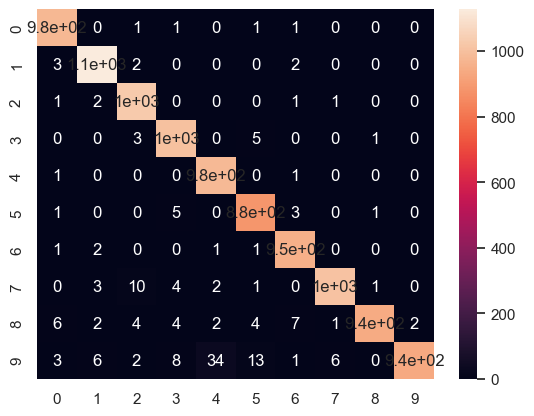

In [ ]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

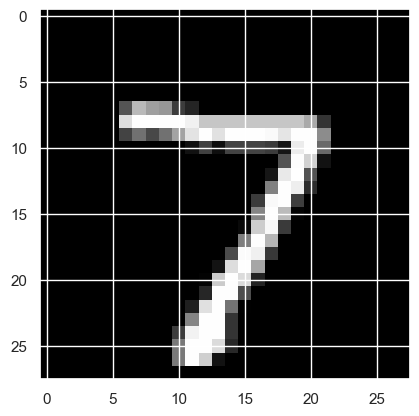

In [ ]:
my_number = x_test[0]

plt.imshow(my_number.reshape(28, 28), cmap='gray')

In [ ]:
model.predict(my_number.reshape(1, 28, 28, 1))
my_number = np.argmax(my_number, axis=1)

1/1 [==============================] - 0s 49ms/step


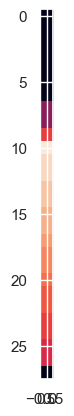

In [ ]:
plt.imshow(my_number)

<h2>Color Data</h2>


In [1]:
from tensorflow.keras.datasets import cifar10

2024-03-13 02:28:59.524795: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-13 02:28:59.614826: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-13 02:28:59.614875: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-13 02:28:59.617044: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-13 02:28:59.628948: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-13 02:28:59.630223: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.set_style('darkgrid')

<Figure size 1200x800 with 0 Axes>

In [4]:
x_train.shape

(50000, 32, 32, 3)

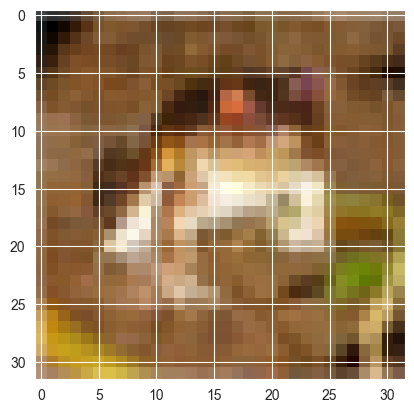

In [5]:
plt.imshow(x_train[0])

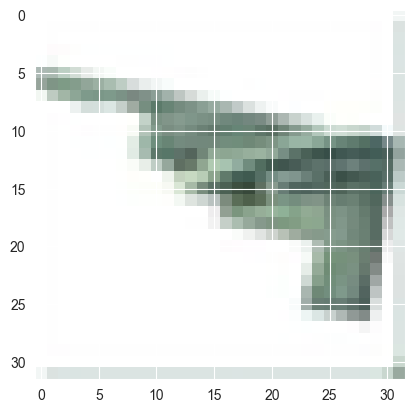

In [6]:
plt.imshow(x_train[12345])

In [7]:
x_train.max()

255

In [8]:
x_train, x_test = x_train/255, x_test/255

In [9]:
x_test.shape

(10000, 32, 32, 3)

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

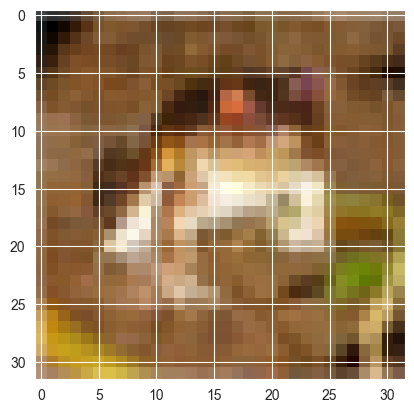

In [12]:
plt.imshow(x_train[0])

In [13]:
x_train /= 255

In [14]:
x_train[0]

array([[[0.00090734, 0.00095348, 0.00096886],
        [0.00066128, 0.00070742, 0.00069204],
        [0.00076894, 0.00073818, 0.00066128],
        ...,
        [0.00242983, 0.00202999, 0.0016609 ],
        [0.00233756, 0.00192234, 0.00156863],
        [0.00227605, 0.00190696, 0.00158401]],

       [[0.00024606, 0.00030757, 0.00030757],
        [0.        , 0.        , 0.        ],
        [0.00027682, 0.00012303, 0.        ],
        ...,
        [0.00189158, 0.00135333, 0.00084583],
        [0.00183007, 0.00127643, 0.00076894],
        [0.0018762 , 0.00133795, 0.00087659]],

       [[0.00038447, 0.00036909, 0.00032295],
        [0.00024606, 0.00010765, 0.        ],
        [0.00075356, 0.00041522, 0.00012303],
        ...,
        [0.00181469, 0.00129181, 0.00076894],
        [0.00184544, 0.00129181, 0.00076894],
        [0.00167628, 0.00112265, 0.00064591]],

       ...,

       [[0.00319877, 0.00261438, 0.00147636],
        [0.00309112, 0.00235294, 0.00052288],
        [0.00304498, 0

In [15]:
x_test /= 255

In [16]:
x_test.shape

(10000, 32, 32, 3)

In [17]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_cat_train = to_categorical(y_train, 10)

In [20]:
y_cat_test = to_categorical(y_test, 10)

In [21]:
y_train[0]

array([6], dtype=uint8)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [23]:
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(4, 4),
          input_shape=(32, 32, 3), activation='relu'))

# Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(4, 4),
          input_shape=(32, 32, 3), activation='relu'))

# Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [26]:
model.fit(x_train, y_cat_train, epochs=15, validation_data=(
    x_test, y_cat_test
), callbacks=[early_stop])

Epoch 1/15


2024-03-13 02:29:21.177722: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 40s 24ms/step - loss: 2.0515 - accuracy: 0.2419 - val_loss: 1.9364 - val_accuracy: 0.3078
Epoch 2/15
1563/1563 [==============================] - 46s 30ms/step - loss: 1.8827 - accuracy: 0.3158 - val_loss: 1.8227 - val_accuracy: 0.3436
Epoch 3/15
1563/1563 [==============================] - 45s 29ms/step - loss: 1.7559 - accuracy: 0.3699 - val_loss: 1.6798 - val_accuracy: 0.3981
Epoch 4/15
1563/1563 [==============================] - 49s 32ms/step - loss: 1.6647 - accuracy: 0.4017 - val_loss: 1.6158 - val_accuracy: 0.4228
Epoch 5/15
1563/1563 [==============================] - 45s 29ms/step - loss: 1.6076 - accuracy: 0.4249 - val_loss: 1.6124 - val_accuracy: 0.4149
Epoch 6/15
1563/1563 [==============================] - 39s 25ms/step - loss: 1.5695 - accuracy: 0.4372 - val_loss: 1.5337 - val_accuracy: 0.4486
Epoch 7/15
1563/1563 [==============================] - 54s 35ms/step - loss: 1.5401 - accuracy: 0.4468 - val_loss: 1.5289 - val_accura

In [28]:
metrics = pd.DataFrame(model.history.history)

In [35]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,2.051529,0.24188,1.936437,0.3078
1,1.882662,0.31576,1.822662,0.3436
2,1.755871,0.36990,1.679795,0.3981
3,1.664695,0.40174,1.615782,0.4228
4,1.607553,0.42490,1.612430,0.4149
5,1.569464,0.43716,1.533716,0.4486
6,1.540091,0.44684,1.528890,0.4547
7,1.516483,0.45750,1.494205,0.4680
8,1.490551,0.46502,1.504633,0.4624
9,1.468265,0.47332,1.463099,0.4770


<Axes: >

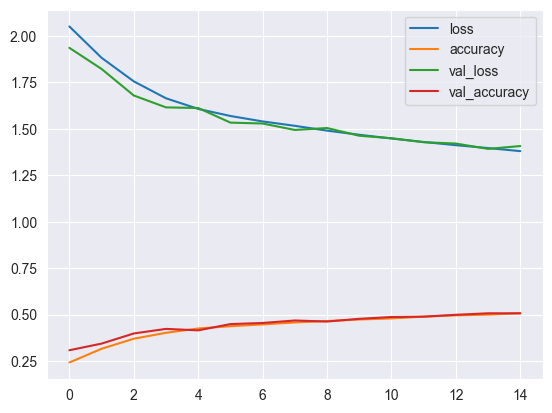

In [29]:
metrics.plot()

<Axes: >

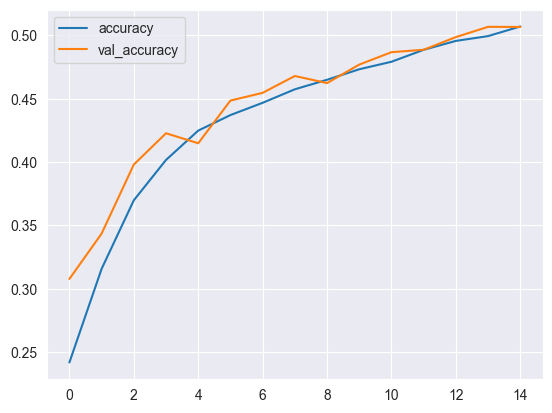

In [32]:
metrics[['accuracy', 'val_accuracy']].plot()

<Axes: >

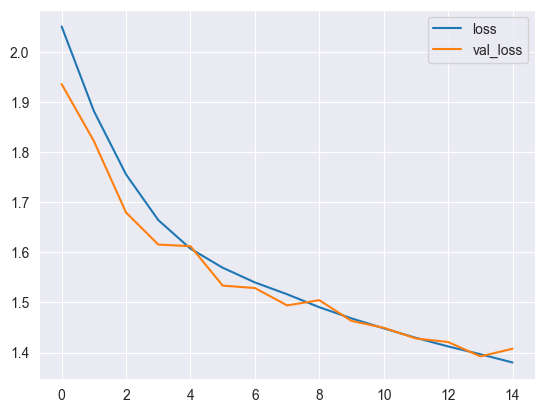

In [33]:
metrics[['loss', 'val_loss']].plot()

In [34]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.4076 - accuracy: 0.5067


[1.407604694366455, 0.5066999793052673]

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
predictions = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 2s 6ms/step


In [42]:
predictions

array([3, 9, 1, ..., 5, 0, 7])

In [43]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.55      0.59      0.57      1000
           1       0.55      0.66      0.60      1000
           2       0.41      0.42      0.42      1000
           3       0.37      0.34      0.35      1000
           4       0.45      0.43      0.44      1000
           5       0.54      0.31      0.40      1000
           6       0.56      0.60      0.58      1000
           7       0.59      0.52      0.55      1000
           8       0.50      0.62      0.56      1000
           9       0.52      0.59      0.55      1000

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.50     10000
weighted avg       0.51      0.51      0.50     10000



In [44]:
confusion_matrix(y_test, predictions)

array([[587,  68,  29,  15,  24,   9,  11,  14, 183,  60],
       [ 31, 655,   6,  10,   8,   8,   9,   8,  93, 172],
       [ 88,  40, 419,  78, 145,  41,  79,  50,  34,  26],
       [ 44,  44, 113, 335,  71, 102, 139,  51,  50,  51],
       [ 52,  23, 158,  47, 428,  32, 109,  84,  51,  16],
       [ 28,  31, 117, 211,  49, 313,  76,  96,  40,  39],
       [ 15,  25,  75,  79, 126,  19, 596,  24,  22,  19],
       [ 48,  38,  60,  76,  74,  44,  25, 521,  40,  74],
       [137,  85,  14,  19,  10,   2,  12,   9, 625,  87],
       [ 36, 182,  19,  25,   7,  10,  10,  21, 102, 588]])

<Axes: >

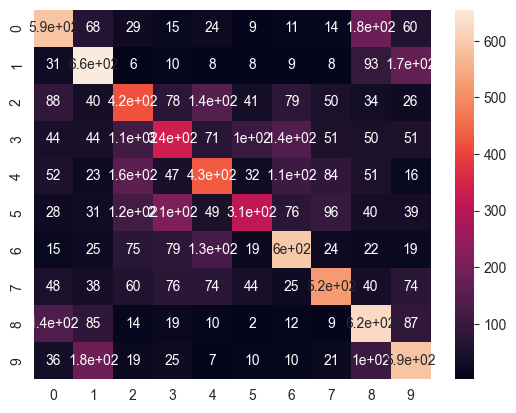

In [45]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)